In [2]:
#Librerías utilizadas
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
totalhouses=pd.read_csv('gdrive/My Drive/Colab Notebooks/totalhouses.csv', parse_dates=['tstp'], index_col="tstp")

In [5]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:30:00,0.110,0.075,0.055,0.938,0.201,0.049,0.01,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.00,0.163,0.092,0.059,0.534,3.183
2011-11-23 14:30:00,0.241,0.318,0.106,0.752,0.248,0.048,0.00,0.177,0.093,0.088,0.353,2.424
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.00,0.162,0.158,0.086,0.242,2.484
2011-11-23 15:30:00,0.296,0.121,0.139,0.261,0.281,0.048,0.00,0.162,0.142,0.116,0.324,1.890


In [6]:
totalhouses.tail()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2014-02-27 22:00:00,0.456,0.631,0.243,0.567,0.184,0.145,0.072,0.192,0.154,0.097,0.396,3.137
2014-02-27 22:30:00,0.354,0.178,0.171,0.695,0.327,0.139,0.083,0.166,0.168,0.065,0.264,2.610
2014-02-27 23:00:00,0.263,0.108,0.132,0.807,0.163,0.141,0.051,0.171,0.142,0.026,0.264,2.268
2014-02-27 23:30:00,0.298,0.078,0.126,0.308,0.122,0.139,0.000,0.168,0.033,0.024,0.330,1.626
2014-02-28 00:00:00,0.218,0.113,0.123,2.249,0.167,0.141,0.000,0.161,0.048,0.026,0.213,3.459


In [7]:
len(totalhouses)

39665

In [0]:
index=totalhouses.index

In [0]:
totalhouses.index = totalhouses.index.floor('1H')


In [10]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.01,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.00,0.163,0.092,0.059,0.534,3.183
2011-11-23 14:00:00,0.241,0.318,0.106,0.752,0.248,0.048,0.00,0.177,0.093,0.088,0.353,2.424
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.00,0.162,0.158,0.086,0.242,2.484
2011-11-23 15:00:00,0.296,0.121,0.139,0.261,0.281,0.048,0.00,0.162,0.142,0.116,0.324,1.890


In [0]:
totalhouses = totalhouses.loc[~totalhouses.index.duplicated(keep='first')]

In [12]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.010,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.000,0.163,0.092,0.059,0.534,3.183
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.000,0.162,0.158,0.086,0.242,2.484
2011-11-23 16:00:00,0.253,0.141,0.070,0.297,0.258,0.048,0.000,0.171,0.066,0.148,0.172,1.624
2011-11-23 17:00:00,0.234,0.226,0.329,0.760,0.272,0.048,0.078,0.381,0.062,0.137,0.218,2.745


In [13]:
len(totalhouses)

19848

In [14]:
totalhouses.tail()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2014-02-27 20:00:00,0.610,0.143,0.188,0.815,0.468,0.149,0.087,0.158,0.028,0.146,0.205,2.997
2014-02-27 21:00:00,0.750,0.576,0.408,0.450,0.248,0.151,0.072,0.166,0.158,0.178,0.125,3.282
2014-02-27 22:00:00,0.456,0.631,0.243,0.567,0.184,0.145,0.072,0.192,0.154,0.097,0.396,3.137
2014-02-27 23:00:00,0.263,0.108,0.132,0.807,0.163,0.141,0.051,0.171,0.142,0.026,0.264,2.268
2014-02-28 00:00:00,0.218,0.113,0.123,2.249,0.167,0.141,0.000,0.161,0.048,0.026,0.213,3.459


In [0]:
df1=totalhouses

In [16]:
df1.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.010,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.000,0.163,0.092,0.059,0.534,3.183
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.000,0.162,0.158,0.086,0.242,2.484
2011-11-23 16:00:00,0.253,0.141,0.070,0.297,0.258,0.048,0.000,0.171,0.066,0.148,0.172,1.624
2011-11-23 17:00:00,0.234,0.226,0.329,0.760,0.272,0.048,0.078,0.381,0.062,0.137,0.218,2.745


In [17]:
df1.dtypes

house1              float64
house2              float64
house3              float64
house4              float64
house5              float64
house6              float64
house7              float64
house8              float64
house9              float64
house10             float64
house11             float64
consumo_agregado    float64
dtype: object

In [0]:
dataset1 = df1.values


In [0]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset1)

In [20]:
dataset[0:5]

array([[0.05053599, 0.01349693, 0.01459854, 0.22552148, 0.06373784,
        0.12468193, 0.016     , 0.06963562, 0.07115629, 0.13063062,
        0.21242996, 0.23051343],
       [0.11893823, 0.00899796, 0.04878986, 0.40024541, 0.05797623,
        0.1221374 , 0.        , 0.03441295, 0.03557814, 0.04774774,
        0.25114622, 0.32495344],
       [0.14088821, 0.05848671, 0.03803304, 0.17030675, 0.16636658,
        0.12468193, 0.        , 0.0340081 , 0.0635324 , 0.07207207,
        0.1023943 , 0.23197659],
       [0.12353241, 0.0404908 , 0.02036112, 0.06822086, 0.08426359,
        0.1221374 , 0.        , 0.03765182, 0.02456586, 0.12792792,
        0.06673459, 0.11758446],
       [0.11383359, 0.07525562, 0.1198617 , 0.1818405 , 0.089305  ,
        0.1221374 , 0.1248    , 0.12267206, 0.02287166, 0.11801801,
        0.09016811, 0.26669327]])

In [21]:
#Dividimos el dataset, seleccionamos 70% para entrenamiento y 30% para test
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

13893 5955


In [22]:
dataset[0:5]

array([[0.05053599, 0.01349693, 0.01459854, 0.22552148, 0.06373784,
        0.12468193, 0.016     , 0.06963562, 0.07115629, 0.13063062,
        0.21242996, 0.23051343],
       [0.11893823, 0.00899796, 0.04878986, 0.40024541, 0.05797623,
        0.1221374 , 0.        , 0.03441295, 0.03557814, 0.04774774,
        0.25114622, 0.32495344],
       [0.14088821, 0.05848671, 0.03803304, 0.17030675, 0.16636658,
        0.12468193, 0.        , 0.0340081 , 0.0635324 , 0.07207207,
        0.1023943 , 0.23197659],
       [0.12353241, 0.0404908 , 0.02036112, 0.06822086, 0.08426359,
        0.1221374 , 0.        , 0.03765182, 0.02456586, 0.12792792,
        0.06673459, 0.11758446],
       [0.11383359, 0.07525562, 0.1198617 , 0.1818405 , 0.089305  ,
        0.1221374 , 0.1248    , 0.12267206, 0.02287166, 0.11801801,
        0.09016811, 0.26669327]])

In [0]:
a = dataset[0:(0 + 1), 0]

In [24]:
a

array([0.05053599])

In [25]:
dataset.shape

(19848, 12)

In [0]:
'''Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 11])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [27]:
#Estableciendo el valor del look backs 
look_back = 200
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

13693
5755


In [28]:
testY[0]

0.07754721897383324

In [29]:
trainX.shape

(13693, 200, 12)

In [30]:
trainX[0]

array([[0.05053599, 0.01349693, 0.01459854, ..., 0.13063062, 0.21242996,
        0.23051343],
       [0.11893823, 0.00899796, 0.04878986, ..., 0.04774774, 0.25114622,
        0.32495344],
       [0.14088821, 0.05848671, 0.03803304, ..., 0.07207207, 0.1023943 ,
        0.23197659],
       ...,
       [0.13833589, 0.10347648, 0.21936228, ..., 0.13153152, 0.38767195,
        0.40316573],
       [0.237366  , 0.21717791, 0.28543989, ..., 0.14144143, 0.15129904,
        0.45969672],
       [0.24910669, 0.22617587, 0.36726855, ..., 0.15495494, 0.76923081,
        0.71787707]])

In [31]:
trainY.shape

(13693,)

In [32]:
trainY[0]

0.4136738439255941

In [0]:
#Reorganizando los datos para el modelo
trainX = np.reshape(trainX, (trainX.shape[0], 200, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 200, testX.shape[2]))

Train on 13693 samples, validate on 5755 samples
Epoch 1/50
 - 67s - loss: 0.0108 - val_loss: 0.0089
Epoch 2/50
 - 67s - loss: 0.0084 - val_loss: 0.0074
Epoch 3/50
 - 67s - loss: 0.0078 - val_loss: 0.0072
Epoch 4/50
 - 67s - loss: 0.0076 - val_loss: 0.0077
Epoch 5/50
 - 67s - loss: 0.0075 - val_loss: 0.0069
Epoch 6/50
 - 66s - loss: 0.0073 - val_loss: 0.0071
Epoch 7/50
 - 67s - loss: 0.0071 - val_loss: 0.0071
Epoch 8/50
 - 67s - loss: 0.0070 - val_loss: 0.0069
Epoch 9/50
 - 67s - loss: 0.0069 - val_loss: 0.0069
Epoch 10/50
 - 67s - loss: 0.0068 - val_loss: 0.0069
Epoch 11/50
 - 67s - loss: 0.0067 - val_loss: 0.0067
Epoch 12/50
 - 66s - loss: 0.0067 - val_loss: 0.0068
Epoch 13/50
 - 66s - loss: 0.0066 - val_loss: 0.0066
Epoch 14/50
 - 66s - loss: 0.0066 - val_loss: 0.0073
Epoch 15/50
 - 66s - loss: 0.0065 - val_loss: 0.0068
Epoch 16/50
 - 66s - loss: 0.0064 - val_loss: 0.0068
Epoch 17/50
 - 67s - loss: 0.0064 - val_loss: 0.0073
Epoch 18/50
 - 67s - loss: 0.0063 - val_loss: 0.0065
Epoch 

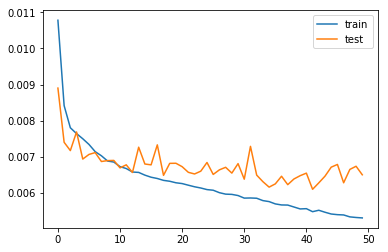

In [35]:
#Estructura de la red, ajustamos los parámetros del modelo LSTM
model = Sequential()
model = Sequential()
model.add(LSTM(130, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='RMSProp')
history = model.fit(trainX, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 130)               74360     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 131       
Total params: 74,491
Trainable params: 74,491
Non-trainable params: 0
_________________________________________________________________


In [37]:
#se predice el siguiente consumo por hora basado en el consumo por hora anterior de las 11 casas
yhat = model.predict(testX)
yhat[0:5]

array([[0.0692568 ],
       [0.13325533],
       [0.10692906],
       [0.11817592],
       [0.12522781]], dtype=float32)

In [38]:
len(yhat)

5755

In [39]:
len(testY)

5755

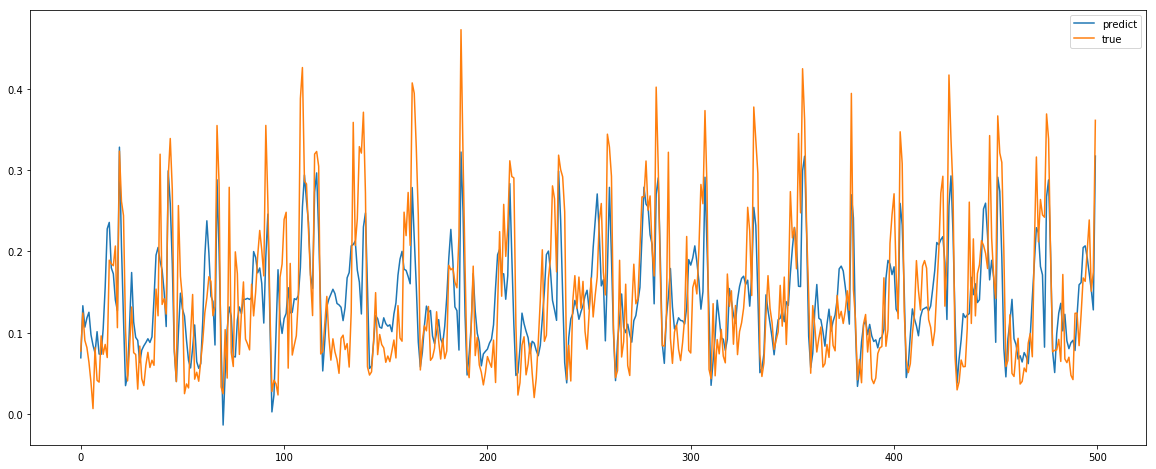

In [40]:
#Ploteamos las primeras 500 entradas para ver la predicción.
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()

In [41]:
print("Mean squared error: %.3f" % mean_squared_error(testY, yhat))

Mean squared error: 0.006


In [42]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 0.081


In [43]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))

Variance : 0.617


In [0]:
# create empty table with 4 fields
testPredict_dataset_like = np.zeros(shape=(len(yhat), 12) )
# put the predicted values in the right field
testPredict_dataset_like[:,0] = yhat[:,0]
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,0]

In [0]:
# create empty table with 4 fields
testY_dataset_like = np.zeros(shape=(len(testY), 12) )
# put the predicted values in the right field
testY_dataset_like[:,0] = testY[:]
# inverse transform and then select the right field
testYnormal = scaler.inverse_transform(testY_dataset_like)[:,0]

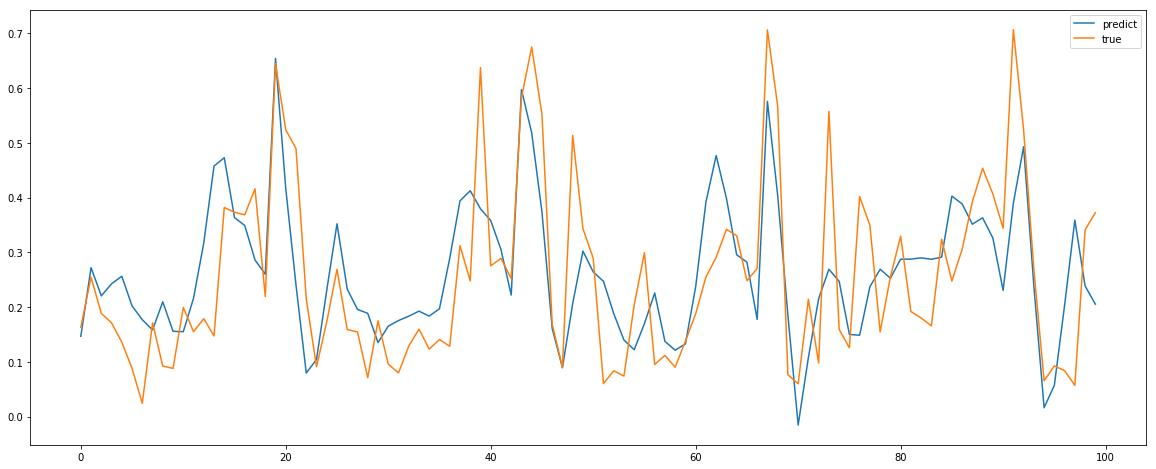

In [46]:
#Ploteamos las primeras 500 entradas para ver la predicción.
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[:100], label='predict')
pyplot.plot(testYnormal[:100], label='true')
pyplot.legend()
pyplot.show()

In [47]:
print("Mean squared error: %.3f" % mean_squared_error(testYnormal, testPredict))

Mean squared error: 0.025


In [48]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testYnormal, testPredict)))

Root mean squared error: 0.158


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testYnormal, testPredict))

Variance : 0.617


In [50]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.3f" % mean_absolute_error(testYnormal, testPredict))

Mean absolute error: 0.120
